Algoritmos Genéticos
===

* 30:00 min | Última modificación: Mayo 23, 2021 | [YouTube]

## Función a minimizar

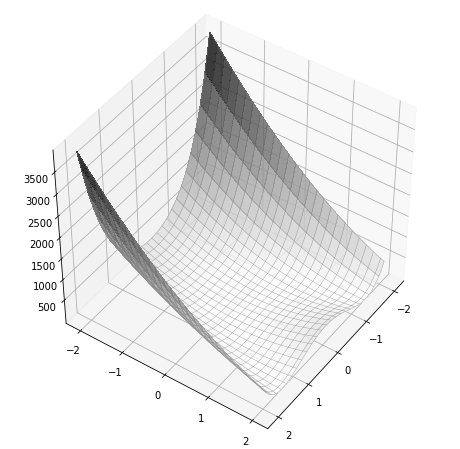

In [1]:
from EAOS.benchmarks import Ackley, Griewank, Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

## Algoritmo

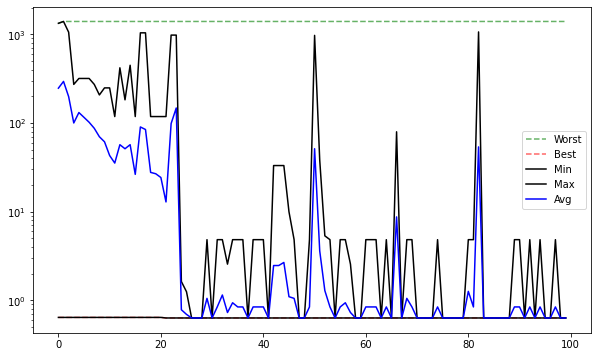

In [2]:
import numpy as np

from EAOS.operators import CrossoverOnePoint
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomBinary
from EAOS.operators import MutationFlipBit
from EAOS.operators import SelectionBest, SelectionRandom, SelectionRoulette
from EAOS.monitor import Monitor

POPSIZE = 20
NBITS = 10
NPARENTS = 7
NGEN = 100


def decoder(bits):
    n1 = sum(bits[: int(NBITS / 2)] * np.power(2.0, np.arange(int(NBITS / 2))))
    n2 = sum(bits[int(NBITS / 2) :] * np.power(2.0, np.arange(int(NBITS / 2))))
    m = sum(np.power(2.0, np.arange(int(NBITS / 2))))
    x = fn.LB[0] + n1 / m * (fn.UB[0] - fn.LB[0])
    y = fn.LB[1] + n2 / m * (fn.UB[1] - fn.LB[1])
    return np.array([x, y])


evaluate = FnEvaluator(fn=fn, decoder=decoder)

generate_population = RandomBinary(
    popsize=POPSIZE,
    n_bits=NBITS,
    seed=123456,
)

parent_selection = SelectionRoulette(
    k=NPARENTS,
    seed=123456,
)

crossover = CrossoverOnePoint(seed=123456)

mutate = MutationFlipBit(probability=0.05, seed=123456)

selection_random = SelectionRandom(k=POPSIZE - 2 * NPARENTS - 1, seed=123456)

elitism = SelectionBest(k=1)

monitor = Monitor()


#
# Algoritmo
#
population = generate_population()
population = evaluate(population)


for _ in range(NGEN):

    p1 = parent_selection(population)
    p2 = parent_selection(population)
    offsprings = crossover(p1, p2) + selection_random(population)
    offsprings = mutate(offsprings)
    offsprings = evaluate(offsprings)
    population = offsprings + elitism(population)
    
    monitor(population)

monitor.plot_stats()

In [3]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1]), 0.6337851050663716)

In [4]:
decoder(monitor.global_x_opt)

array([0.33032258, 0.06606452])

In [5]:
decoder(np.array([1] * NBITS))

array([2.048, 2.048])

In [6]:
decoder(np.array([0] * NBITS))

array([-2.048, -2.048])

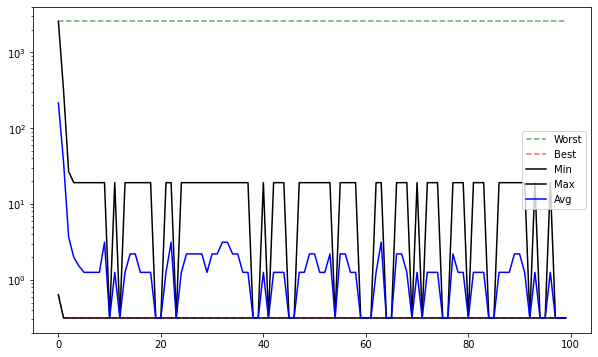

In [7]:
from EAOS.operators import SelectionTournament

parent_selection = SelectionTournament(
    k=NPARENTS,
    tournsize=10,
    seed=123456,
)

#
# Algoritmo
#
monitor = Monitor()
population = generate_population()
population = evaluate(population)

for _ in range(NGEN):

    p1 = parent_selection(population)
    p2 = parent_selection(population)
    offsprings = crossover(p1, p2) + selection_random(population)
    offsprings = mutate(offsprings)
    offsprings = evaluate(offsprings)
    population = offsprings + elitism(population)
    
    monitor(population)

monitor.plot_stats()

In [8]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1]), 0.3135067213105953)